In [16]:
# Libraries Imported 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, roc_curve, confusion_matrix
# Importing Sequential class
from tensorflow.keras.models import Sequential


In [17]:
# Load the training dataset
instagram_df_train = pd.read_csv('insta_train.csv')
instagram_df_train

# Load the testing data
instagram_df_test = pd.read_csv('insta_test.csv')
instagram_df_test

# Display the first few rows of the training dataset
instagram_df_train.head()

# Display the last few rows of the training dataset
instagram_df_train.tail()

# Display the first few rows of the testing dataset
instagram_df_test.head()

# Display the last few rows of the testing dataset
instagram_df_test.tail()


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
115,1,0.29,1,0.0,0,0,0,0,13,114,811,1
116,1,0.40,1,0.0,0,0,0,0,4,150,164,1
117,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.0,0,0,0,0,1,219,1695,1
119,1,0.44,1,0.0,0,0,0,0,3,39,68,1


In [18]:
# Performing Exploratory Data Analysis (EDA)

# Getting dataframe info
instagram_df_train.info()

# Get the statistical summary of the dataframe
instagram_df_train.describe()

# Checking if null values exist
instagram_df_train.isnull().sum()

# Get the number of unique values in the "profile pic" feature
instagram_df_train['profile pic'].value_counts()

# Get the number of unique values in "fake" (Target column)
instagram_df_train['fake'].value_counts()

# Display info about the testing dataset
instagram_df_test.info()

# Get the statistical summary of the testing dataset
instagram_df_test.describe()

# Checking if null values exist in the testing dataset
instagram_df_test.isnull().sum()

# Get the number of unique values in "fake" in the testing dataset
instagram_df_test['fake'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column             

fake
0    60
1    60
Name: count, dtype: int64

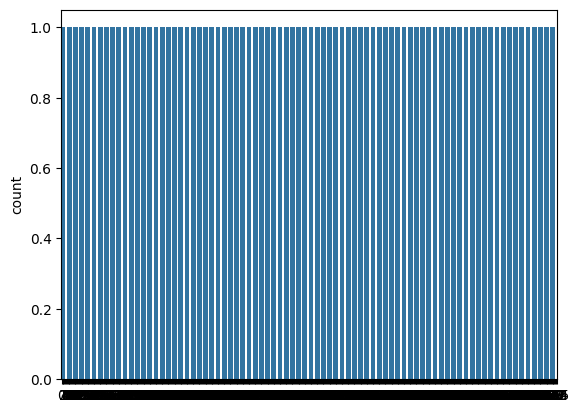

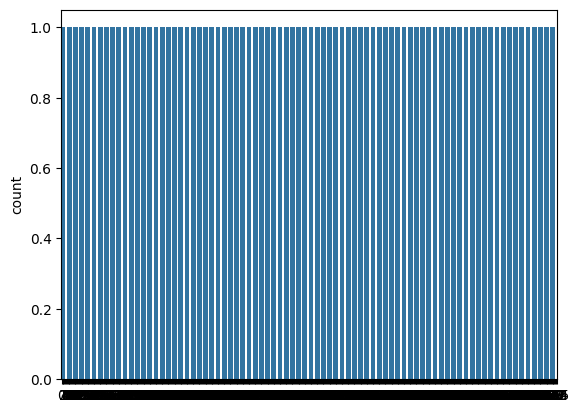

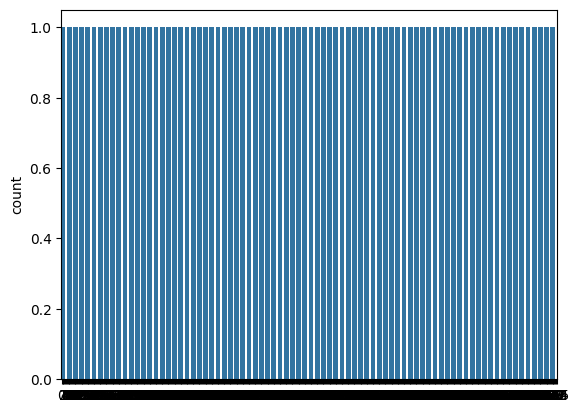

C:\Users\HP\AppData\Local\Temp\ipykernel_11952\890349451.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(instagram_df_train['nums/length username'])


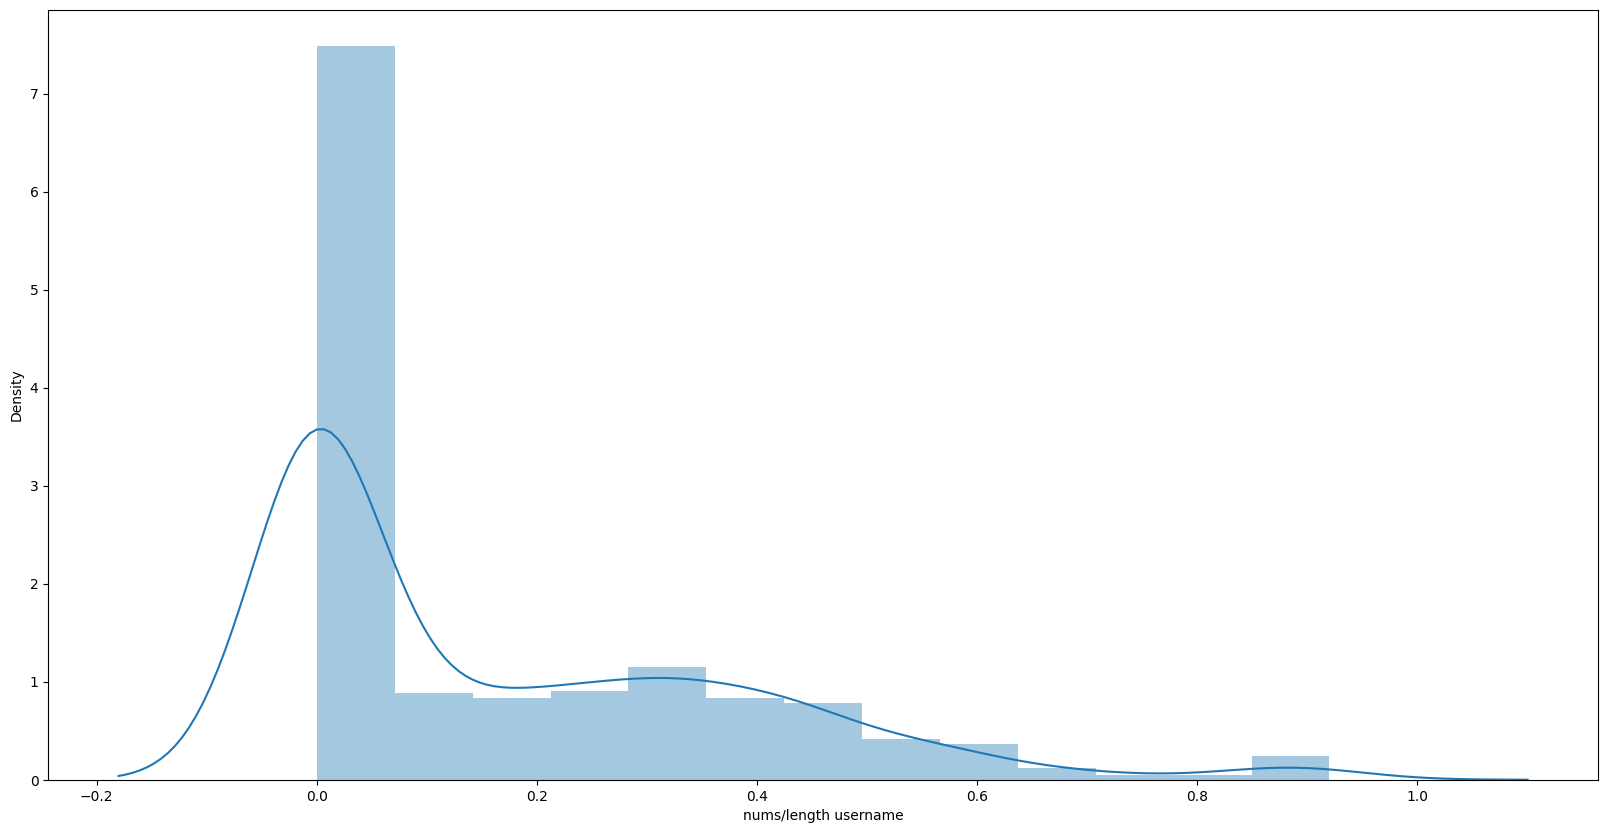

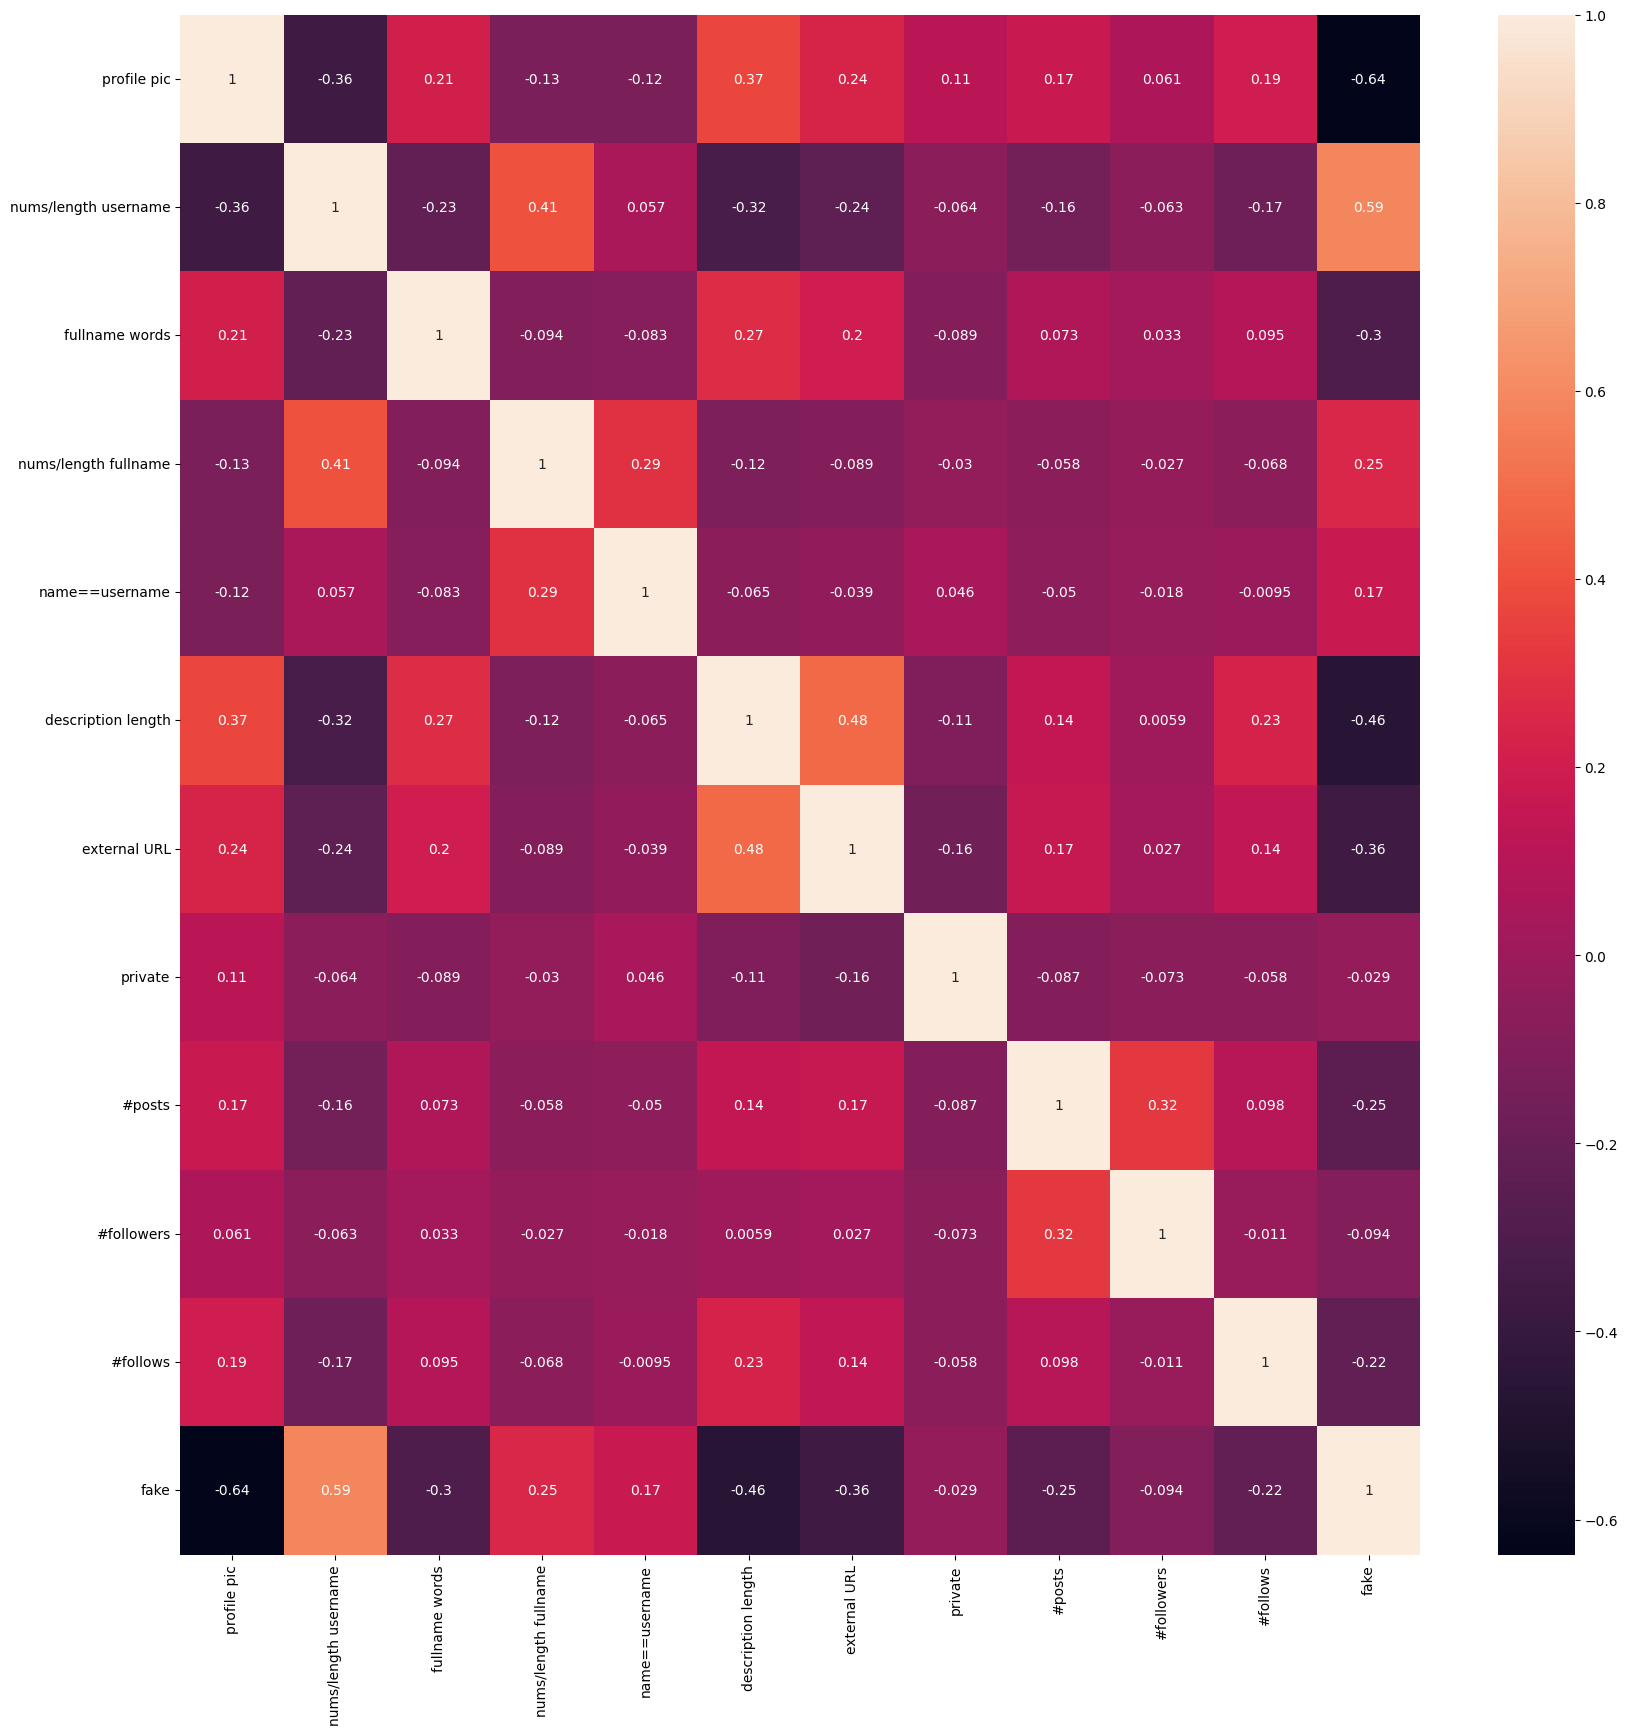

<Axes: ylabel='count'>

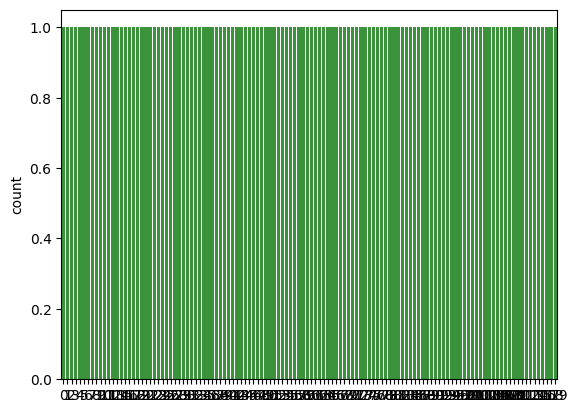

In [19]:
# Perform Data Visualizations

# Visualize the distribution of "fake" in the training dataset
sns.countplot(instagram_df_train['fake'])
plt.show()

# Visualize the distribution of "private" in the training dataset
sns.countplot(instagram_df_train['private'])
plt.show()

# Visualize the distribution of "profile pic" in the training dataset
sns.countplot(instagram_df_train['profile pic'])
plt.show()

# Visualize the distribution of "nums/length username" in the training dataset
plt.figure(figsize=(20, 10))
sns.distplot(instagram_df_train['nums/length username'])
plt.show()

# Correlation plot for the training dataset
plt.figure(figsize=(20, 20))
cm = instagram_df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
plt.show()

# Visualize the distribution of "fake" in the testing dataset
sns.countplot(instagram_df_test['fake'])

# Visualize the distribution of "private" in the testing dataset
sns.countplot(instagram_df_test['private'])

# Visualize the distribution of "profile pic" in the testing dataset
sns.countplot(instagram_df_test['profile pic'])


In [20]:
# Preparing Data to Train the Model

# Training and testing dataset (inputs)
X_train = instagram_df_train.drop(columns=['fake'])
X_test = instagram_df_test.drop(columns=['fake'])

# Display X_train
X_train

# Display X_test
X_test

# Training and testing dataset (Outputs)
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']

# Display y_train
y_train

# Display y_test
y_test

# Scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Display the shapes of training and testing datasets 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Calculate the percentage of data for training and testing
Training_data = len(X_train) / (len(X_test) + len(X_train)) * 100
Training_data

Testing_data = len(X_test) / (len(X_test) + len(X_train)) * 100
Testing_data


17.24137931034483

In [21]:
# Building and Training Deep Training Model

# Define the model architecture
model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

# Display model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs_hist = model.fit(X_train, y_train, epochs=50, verbose=1, validation_split=0.1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 25)                3775      
                                                                 
 dropout_2 (Dropout)         (None, 25)                0

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                600       
                                                                 
 dense_6 (Dense)             (None, 150)               7650      
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_7 (Dense)             (None, 25)                3775      
                                                                 
 dropout_4 (Dropout)         (None, 25)                0         
                                                                 
 dense_8 (Dense)             (None, 25)                650       
                                                                 
 dropout_5 (Dropout)         (None, 25)               

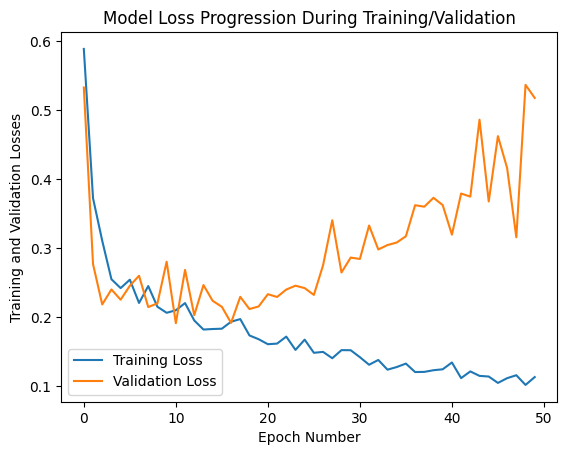

4/4 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.28      0.15      0.20        60
           1       0.42      0.62      0.50        60

    accuracy                           0.38       120
   macro avg       0.35      0.38      0.35       120
weighted avg       0.35      0.38      0.35       120



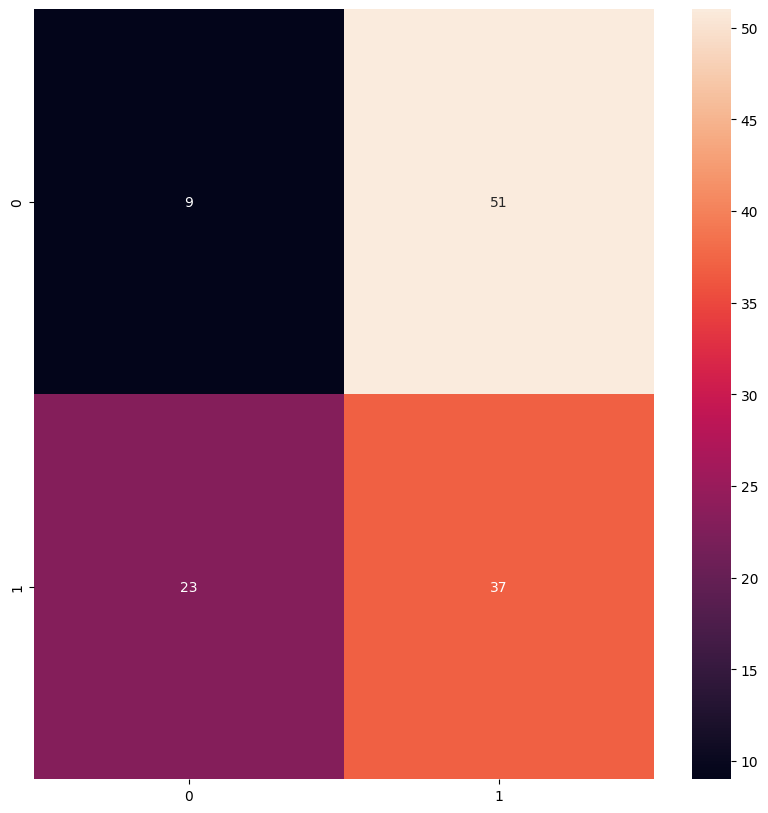

In [22]:
# Access the Performance of the model

# Define another model architecture
model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

# Display model summary
model.summary()

# Print the keys of epoch history
print(epochs_hist.history.keys())

# Plot the training and validation loss progression
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

# Make predictions on the testing dataset
predicted = model.predict(X_test)

predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))
    
for i in y_test:
    test.append(np.argmax(i))

# Print the classification report
print(classification_report(test, predicted_value))

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
cm = confusion_matrix(test, predicted_value)
sns.heatmap(cm, annot=True)
plt.show()
